# Simple CNN for Image Classification (CIFAR-10 Dataset)
In this notebook, we will build a simple Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. This dataset consists of 60,000 32x32 color images in 10 different classes.

The steps we'll cover:
1. Load and preprocess the CIFAR-10 dataset.
2. Define a simple CNN architecture.
3. Compile and train the model.
4. Evaluate the model's performance.
5. Visualize the training results.


In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


## 1. Load and Preprocess the Dataset

Let's load the CIFAR-10 dataset and preprocess the images by normalizing the pixel values.


Load the CIFAR-10 dataset from Keras' built-in dataset module and split it into training and test sets. After that, we'll normalize the pixel values of the images to fall between 0 and 1.


In [8]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 673s 4us/step


## 2. Explore the Data

Let's display a few images from the dataset along with their corresponding labels.


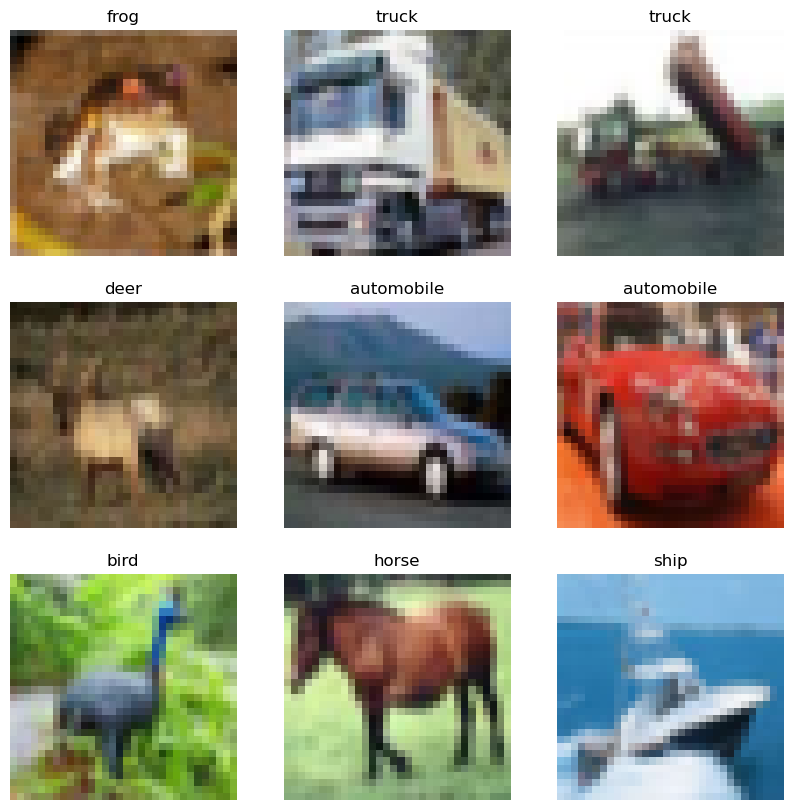

In [15]:
# Display the first 9 images of the training set
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

## 3. Define the CNN Architecture

Let'sl create a simple CNN architecture with three convolutional layers followed by max pooling. After that, we'll flatten the feature maps and add a fully connected layer to classify the images into 10 categories.



In [17]:
# Initialize the model
model = models.Sequential()

# First Convolutional Layer with ReLU and MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer with ReLU and MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer with ReLU and MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the layers before adding fully connected layers
model.add(layers.Flatten())

# Fully connected layers (Dense)
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (one per class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Summary of the CNN architecture
model.summary()


C:\Users\rajka\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile the Model
Let's compile the CNN using the `Adam` optimizer and the `sparse_categorical_crossentropy` loss function, as this is a multi-class classification problem.


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 5. Train the Model
Let's train the model for 10 epochs. During each epoch, the model will use the training data to learn and then validate its performance on the test data.


In [21]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.3508 - loss: 1.7453 - val_accuracy: 0.5617 - val_loss: 1.2153
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.5853 - loss: 1.1694 - val_accuracy: 0.6145 - val_loss: 1.0999
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6449 - loss: 1.0004 - val_accuracy: 0.6645 - val_loss: 0.9729
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6887 - loss: 0.8859 - val_accuracy: 0.6702 - val_loss: 0.9348
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7161 - loss: 0.8106 - val_accuracy: 0.6964 - val_loss: 0.8722
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7401 - loss: 0.7367 - val_accuracy: 0.7002 - val_loss: 0.8537
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 30ms/step - accuracy: 0.7542 - loss: 0.7005 - val_accuracy: 0.7037 - val_loss: 0.8675
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.7757 -

## 6. Evaluate the Model
After training, we will evaluate the model on the test set to check its accuracy and generalization performance.


In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 4s - 14ms/step - accuracy: 0.7226 - loss: 0.8346

Test accuracy: 0.722599983215332


## 7. Visualize the Training and Validation Accuracy/Loss
Let's plot the accuracy and loss over the epochs to observe how well the model performs and whether it's improving with training.


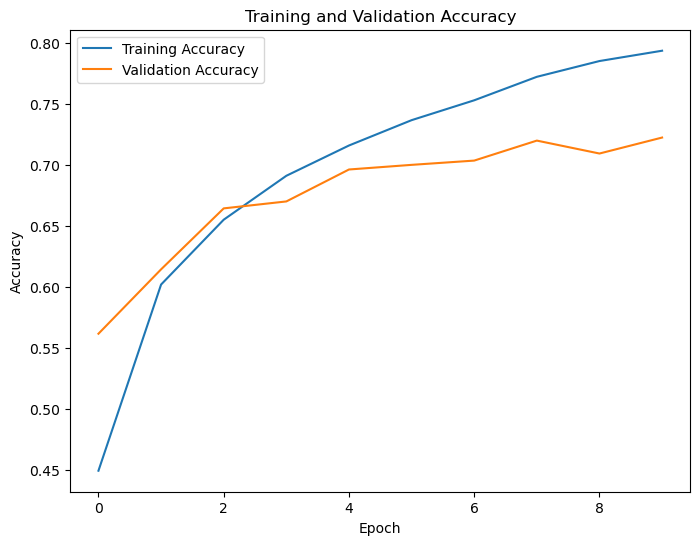

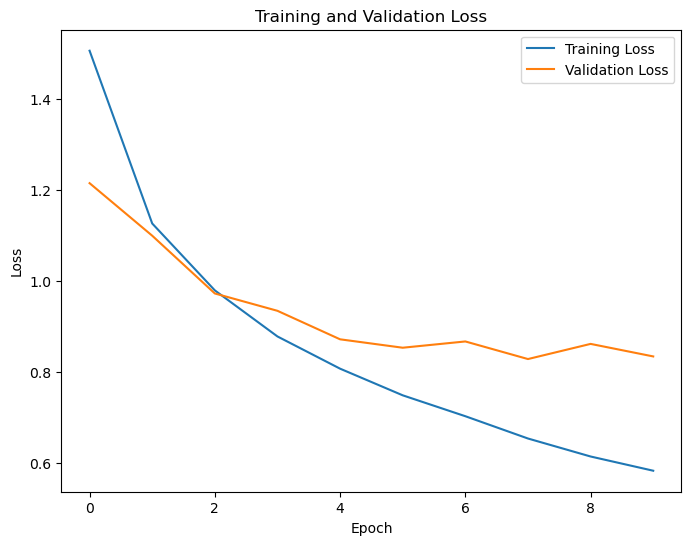

In [27]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 8. Make Predictions

Let's use the trained model to make predictions on the test set and visualize some of the results.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


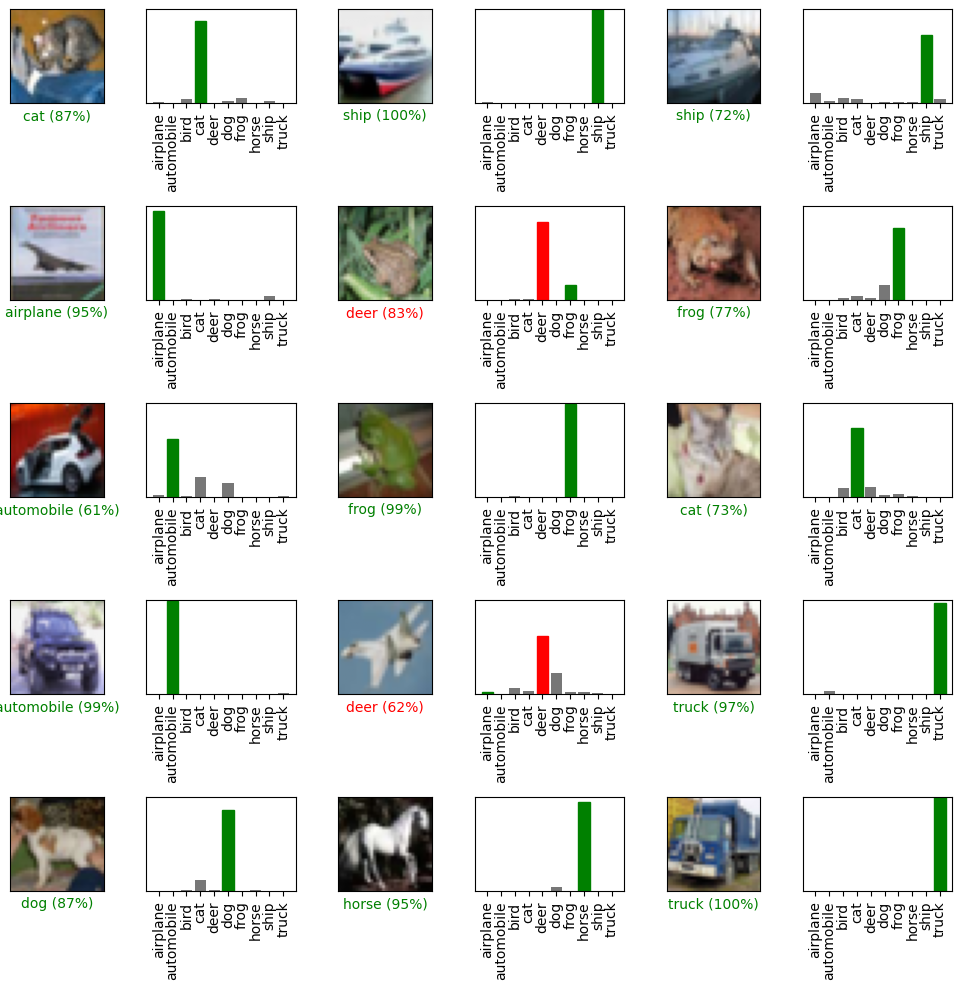

In [29]:
# Make predictions on the test set
predictions = model.predict(test_images)

# Function to plot the image along with predicted and true labels
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    predicted_label = np.argmax(predictions_array[i])
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array[i]):2.0f}%)", color=color)

# Function to plot the prediction probabilities
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    bars = plt.bar(range(10), predictions_array[i], color="#777777")
    plt.ylim([0, 1])
    bars[np.argmax(predictions_array[i])].set_color('red')
    bars[true_label].set_color('green')

# Plot test images with predictions and true labels
num_images = 15
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 6, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(5, 6, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()


## Conclusion
In this notebook, we built a simple CNN to classify images from the CIFAR-10 dataset. 
We explored how to load and preprocess data, define a basic CNN architecture, compile and train the model, and evaluate its performance. 
The training and validation accuracy/loss plots give us a visual indication of the model's performance during training.
